In [1]:
#Suhani Koppolu, CMOR220, Fall 2023
#comp_bridges.ipynb
#Plots a bridge and a deformed bridge
#Last modified: 11/21/2023

#Imported libraries

import numpy as np
from matplotlib import pyplot as plt

In [2]:
def BridgeAXYL(NoS):
  #Creates arrays for bridge construction
  #Input: NoS; a number
  #Output: Adj,xc,yc,L; a matrix

  #Important Values
  nodes = 2 * NoS + 2
  beams = 5 * NoS + 5
  s = np.sqrt(2)

  #Set up left end of bridge
  #Preallocate Matrixes
  Adj = np.zeros((beams,2 * nodes))
  L = np.ones((beams,1))
  xc = np.zeros((beams,2))
  yc = np.zeros((beams,2))

  #Left end of Adjacency Matrix
  Adj[0,0] = 1
  Adj[1,[2,3]] = [1/s,1/s]

  #Left end of Column Matrix
  L[1] = s

  #Left end coordinates
  xc[0,:] = [0,1]
  yc[0,:] = [0,0]

  xc[1,:] = [0,1]
  yc[1,:] = [0,1]

  #For loop to set up bridge's core
  for n in range(1,NoS + 1):

    R = 5 * n - 3
    C = 4 * n - 4

    #Adjacency Matrix values for bridge's core
    Adj[R+0,[C+0,C+1,C+2,C+3]] = [0,-1,0,1]
    Adj[R+1,[C+2,C+3,C+4,C+5]] = [-1/s,1/s,1/s,-1/s]
    Adj[R+2,[C+2,C+3,C+6,C+7]] = [-1,0,1,0]
    Adj[R+3,[C+0,C+1,C+6,C+7]] = [-1/s,-1/s,1/s,1/s]
    Adj[R+4,[C+0,C+1,C+4,C+5]] = [-1,0,1,0]

    #Column Matrix values for bridge's core
    L[R+1] = [s]
    L[R+3] = [s]

    #Coordinate values for bridge's core
    xc[R+0,:] = [n+0,n+0]
    yc[R+0,:] = [0,1]

    xc[R+1,:] = [n+0,n+1]
    yc[R+1,:] = [1,0]

    xc[R+2,:] = [n+0,n+1]
    yc[R+2,:] = [1,1]

    xc[R+3,:] = [n+0,n+1]
    yc[R+3,:] = [0,1]

    xc[R+4,:] = [n+0,n+1]
    yc[R+4,:] = [0,0]

  #Set up right end of bridge
  R = 5 * NoS + 2
  C = 4 * NoS

  #Adjacency Matrix values for right end of bridge
  Adj[R+0,[C+0,C+1,C+2,C+3]] = [0,-1,0,1]
  Adj[R+1,[C+2,C+3]] = [-1/s,1/s]
  Adj[R+2,[C+0,C+1]] = [-1,0]

  #Column Matrix values for right end of bridge
  L[R+1] = [s]

  #Coordinate values for right end of bridge
  xc[R+0,:] = [NoS+1,NoS+1]
  yc[R+0,:] = [0,1]

  xc[R+1,:] = [NoS+1,NoS+2]
  yc[R+1,:] = [1,0]

  xc[R+2,:] = [NoS+1,NoS+2]
  yc[R+2,:] = [0,0]

  #Values to return
  return Adj,xc,yc,L

In [3]:
adj,xc,yc,L = BridgeAXYL(2)
adj.shape

(15, 12)

In [4]:
def ForceVector(NoS,CarWeight):
  #Creates arrays for bridge construction
  #Input: NoS,CarWeight; a number
  #Output: F; a matrix

  nodes = 2 * NoS + 2

  #Set up and preallocate F
  F = np.zeros((2*nodes,1))

  #for loop that fills in Force matrix
  for n in range(1,len(F),4):
    F[n] = -CarWeight

  #Returns Force matrix
  return F

In [5]:
def BridgeDeformer(Adj,xc,yc,L,F,NoS):
  #Set up values
  print(Adj.shape)
  print(L.shape)
  K = np.identity(len(L))/L
  S = Adj.T@K@Adj
  #Solve the linear system
  D = np.linalg.solve(S,F)
  #Solve for work
  W=D.T@F
  #Slice out dx and dy from D
  dx = D[0::2,0]
  dy = D[1::2,0]

  #Creates deformed x and y coordinate arrays
  xcd = np.zeros((xc.shape))
  ycd = np.zeros((yc.shape))

  #Deform the left end
  S = 0

  xcd[0,:] = xc[0,:] + [0,dx[0]]
  ycd[0,:] = yc[0,:] + [0,dy[0]]

  xcd[1,:] = xc[1,:] + [0,dx[1]]
  ycd[1,:] = yc[1,:] + [0,dy[1]]

  for n in range(1,NoS+1):
    #Use R and C to fill bridge's core
    R = 5 * n - 3

    xcd[R+0,:] = xc[R+0,:] + [dx[0+2*S],dx[1+2*S]]
    ycd[R+0,:] = yc[R+0,:] + [dy[0+2*S],dy[1+2*S]]

    xcd[R+1,:] = xc[R+1,:] + [dx[1+2*S],dx[2+2*S]]
    ycd[R+1,:] = yc[R+1,:] + [dy[1+2*S],dy[2+2*S]]

    xcd[R+2,:] = xc[R+2,:] + [dx[1+2*S],dx[3+2*S]]
    ycd[R+2,:] = yc[R+2,:] + [dy[1+2*S],dy[3+2*S]]

    xcd[R+3,:] = xc[R+3,:] + [dx[0+2*S],dx[3+2*S]]
    ycd[R+3,:] = yc[R+3,:] + [dy[0+2*S],dy[3+2*S]]

    xcd[R+4,:] = xc[R+4,:] + [dx[0+2*S],dx[2+2*S]]
    ycd[R+4,:] = yc[R+4,:] + [dy[0+2*S],dy[2+2*S]]

    #Deform the core of the bridge
    S = S + 1

  R = 5 * NoS + 2

  xcd[R+0,:] = xc[R+0,:] + [dx[-2],dx[-1]]
  ycd[R+0,:] = yc[R+0,:] + [dy[-2],dy[-1]]

  xcd[R+1,:] = xc[R+1,:] + [dx[-1],0]
  ycd[R+1,:] = yc[R+1,:] + [dy[-1],0]

  xcd[R+2,:] = xc[R+2,:] + [dx[-2],0]
  ycd[R+2,:] = yc[R+2,:] + [dy[-2],0]


  #Deform the right end of the bridge
  return xcd,ycd,W

In [6]:
def BasicBridgePlotter(xc,yc,NoS):
#Plot basic bridge
  plt.figure()
  plt.plot(xc.T,yc.T,"blue")

  #plt.xlim([-1,4])
  #plt.ylim([-2,2])]

  R = 5 * NoS + 2

  plt.fill([-1,0,0.5,-1],[0,0,-1,-1],"black")
  plt.fill([R+2,4,4,2.5],[0,0,-1,-1],"black")

  plt.title(str(NoS) + "Section Bridge")
  plt.show()

In [7]:
def DeformedBridgePlotter(xcd,ycd,NoS,CarWeight,W):
  #Plots the deformed bridge
  plt.figure()
  plt.plot(xcd.T,ycd.T,"blue")
  #plt.xlim([-1,4])
  #plt.ylim([-2,2])
  #plt.fill([-1,0,0.5,-1],[0,0,-1,-1],"black")
  #plt.fill([3,4,4,2.5],[0,0,-1,-1],"black")
  #plt.title(str(NoS)+"Section Deformed Bridge\nCW="+str(CarWeight)+"|"Work="+ Str(W))

In [8]:
def SpyTool(Adj,NoS):
  plt.figure(1)
  plt.imshow(Adj)
  plt.spy(Adj,marker='o',markerfacecolor='red',markersize=5.5)
  plt.show(1)

In [9]:
def BridgeOperator(NoS,CarWeight):
  [Adj,xc,yc,L] = BridgeAXYL(NoS)
  print(L.shape)
  F = ForceVector(NoS,CarWeight)
  [xcd,ycd,W] = BridgeDeformer(Adj,xc,yc,L,F,NoS)
  return Adj,xc,yc,xcd,ycd,W

In [11]:
[Adj,xc,yc,xcd1,ycd1,W1] = BridgeOperator(2,0)
W1

(15, 1)
(15, 12)
(15, 1)


array([[0.]])

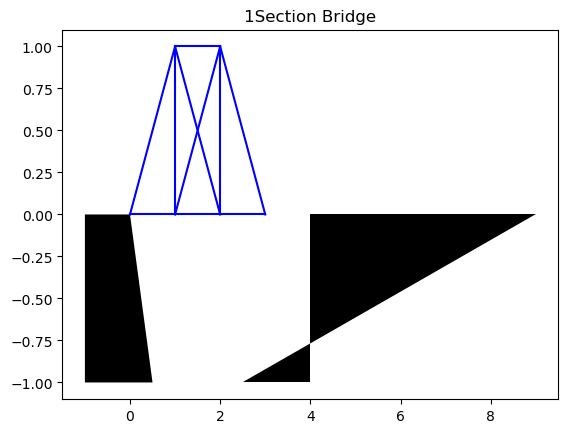

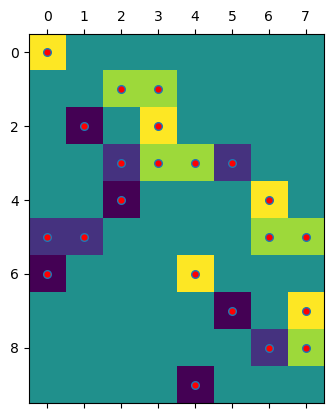

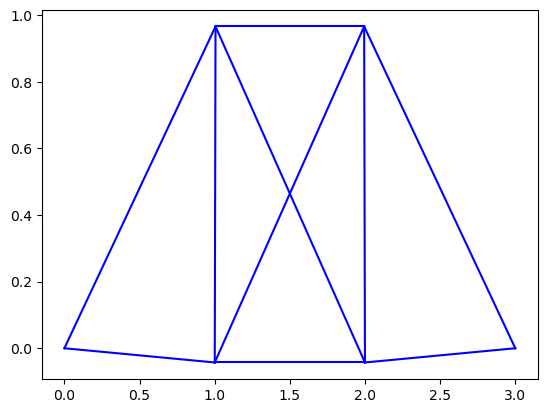

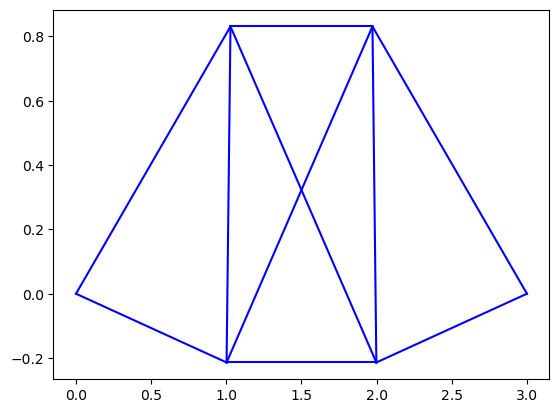

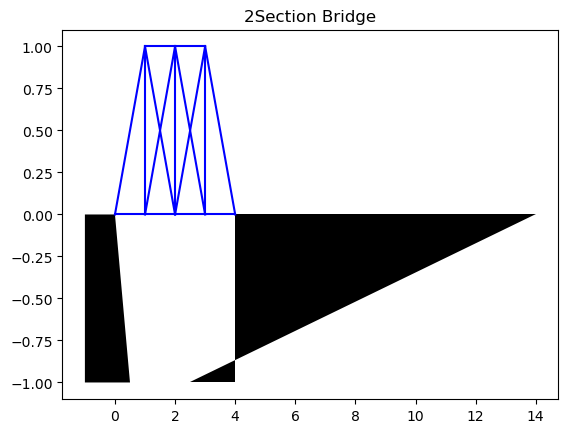

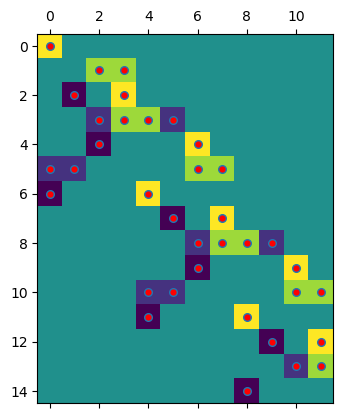

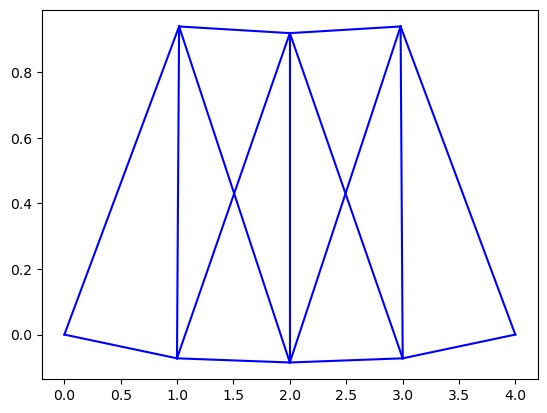

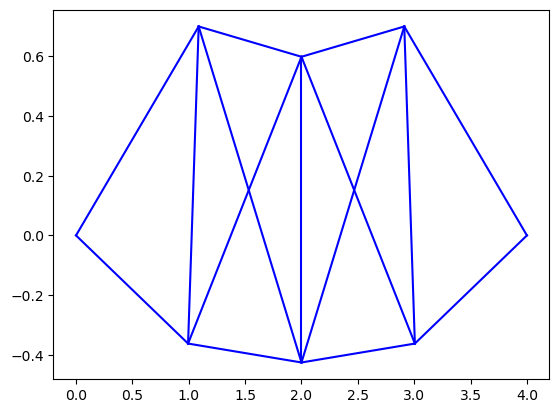

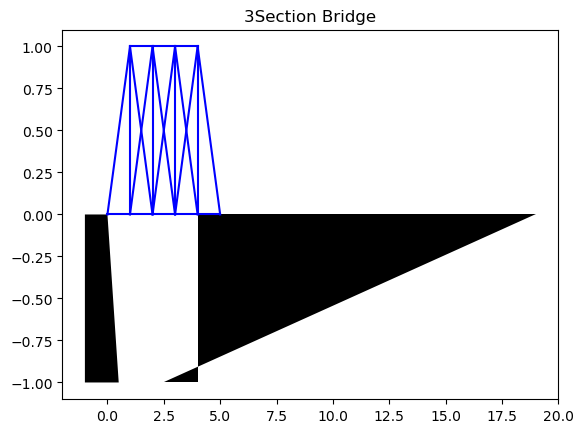

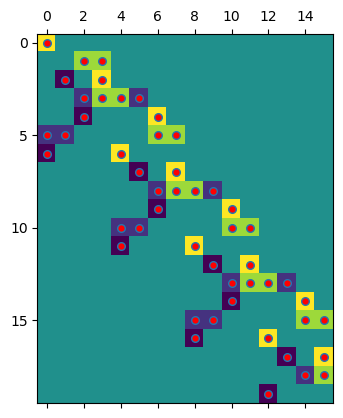

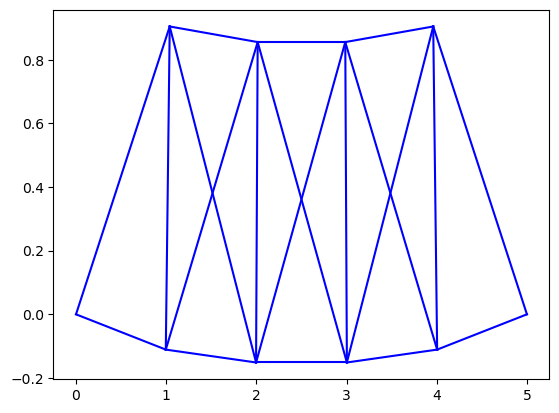

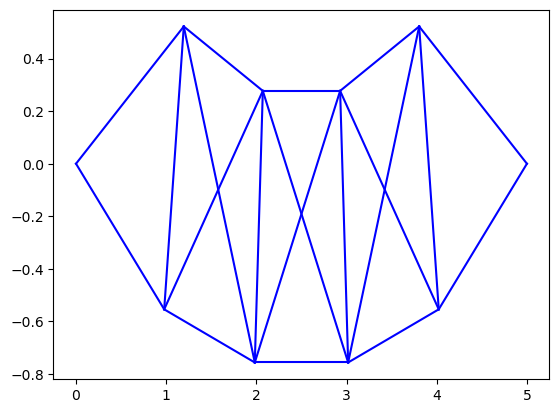

In [31]:
for NoS in range(1,4):
  [Adj,xc,yc,xcd1,ycd1,W1] = BridgeOperator(NoS,0)
  BasicBridgePlotter(xc,yc,NoS)
  SpyTool(Adj,NoS)
  [Adj,xc,yc,xcd1,ycd1,W1] = BridgeOperator(NoS,0.01)
  DeformedBridgePlotter(xcd1,ycd1,NoS,0.01,W1)
  [Adj,xc,yc,xcd2,ycd2,W2] = BridgeOperator(NoS,0.05)
  DeformedBridgePlotter(xcd2,ycd2,NoS,0.05,W2)